In [3]:
from temul.lattice_structure_tools import calculate_atom_plane_curvature
import atomap.api as am
import hyperspy.api as hs
import os

if "data" not in os.path.abspath(''):
    path_to_data = os.path.join(os.path.abspath(''), "data") 
    os.chdir(path_to_data)


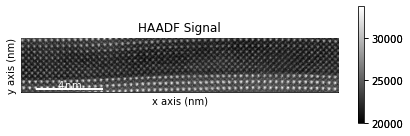

In [4]:
# Load and plot the image

image = hs.load('Cropped_PTO-SRO_Aligned.hspy')
image.plot()

In [5]:
# Get the image pixel sampling from the image

sampling = image.axes_manager[-1].scale #  nm/pix
units = image.axes_manager[-1].units

In [6]:
# Open the pre-made PTO-SRO atom lattice. 
atom_lattice = am.load_atom_lattice_from_hdf5("Atom_Lattice_crop.hdf5")
sublattice1 = atom_lattice.sublattice_list[0] #  Pb-Sr Sublattice
sublattice2 = atom_lattice.sublattice_list[1] #  Ti-Ru Sublattice

In [7]:
# Plot the sublattice planes to see which zone_vector_index we use

sublattice2.construct_zone_axes(atom_plane_tolerance=1)
# sublattice2.plot_planes()

In [8]:
# Set up parameters for calculate_atom_plane_curvature

zone_vector_index = 0
atom_planes = (2, 6) #  chooses the starting and ending atom planes
vmin, vmax = 1, 2
cmap = 'bwr' #  see matplotlib and colorcet for more colormaps
title = 'Curvature Map'
filename = None #  Set to a string if you want to save the map

In [9]:
# Set the extra initial fitting parameters

p0 = [14, 10, 24, 173]
kwargs = {'p0': p0, 'maxfev': 1000}

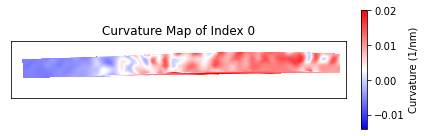

In [10]:
# We want to see the curvature in the SRO Sublattice

curvature_map = calculate_atom_plane_curvature(sublattice2, zone_vector_index,
                    sampling=sampling, units=units, cmap=cmap, title=title,
                    atom_planes=atom_planes, **kwargs)

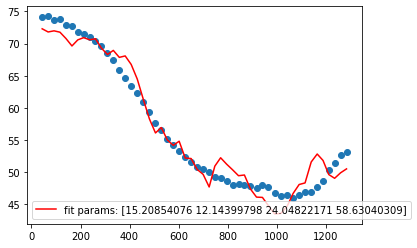

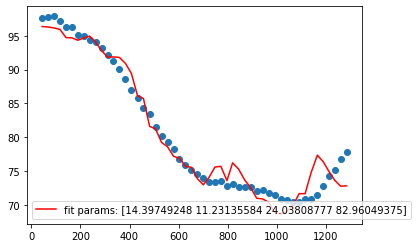

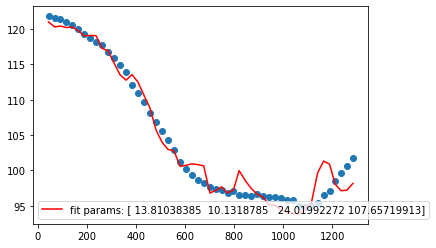

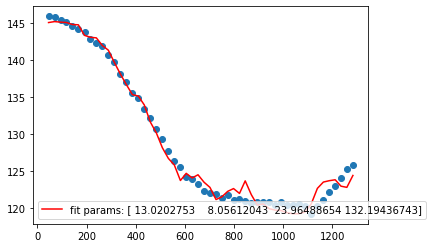

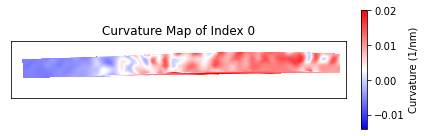

In [11]:
# When using plot_and_return_fits=True, the function will return the curve
#   fittings, and plot each plane.

curvature_map, fittings = calculate_atom_plane_curvature(sublattice2, zone_vector_index,
                    sampling=sampling, units=units, cmap=cmap, title=title,
                    atom_planes=atom_planes, **kwargs,
                    plot_and_return_fits=True)